# Neural Network from Scratch


## Import libraries

We will be using the lower resolution MINST data set

In [0]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
from sklearn import preprocessing

## Looking at the data

After we load the data, we print the shape of the data and a pixelated digit.

We also show what the features of one example looks like.

The neural net will learn to estimate which digit these pixels represent.

The shape of the digits dataset:
(1797, 64)


<Figure size 432x288 with 0 Axes>

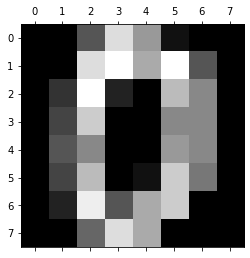

[0]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [170]:
# load all the digits (img)
digits = load_digits()
# load the data from the digit (img)
X = digits.data
y = digits.target
print("The shape of the digits dataset:") 
print(digits.data.shape)
# plot the digits
# using .gray()

# and .matshow() with argument digit.images[xx]

# plt.show()

# get the gt for this digit img
plt.gray()
plt.matshow(digits.images[0])
# print(digits.images[0])
plt.show()
print(y[0:1])
print(X[0,:])
print(X)

## 1) Scale the dataset
The training features range from 0 to 15.  To help the algorithm converge, we will scale the data to have a mean of 0 and unit variance

In [171]:
# use the stander lib to scale the data
# init the scaler 
# scaler = StandardScaler()
# # fit the data to the scaler 
# scaler.fit_transform(X)
# scaler.transform(X)
# Looking the new features after scaling
X = preprocessing.scale(X)
print(X[0])
print("Mean: ",np.mean(X))
print("Standard Deviation: ",np.std(X))

[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]
Mean:  8.649483775599439e-19
Standard Deviation:  0.9762812094883324


## 2) Creating training and test datasets
We split the data into training and test data sets. We will train the neural network with the training dataset, and evaluate our neural network with the test dataset 

In [0]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## 3) Setting up the output layer

### One hot encoding

In [173]:
def convert_y_to_vect(y):
#     Our target is an integer in the range [0,..,9], so we will have 10 output neuron's in our network.  

#     If  y=0 we want the output neurons to have the values (1,0,0,0,0,0,0,0,0,0)
#     If  y=1 we want the output neurons to have the values (0,1,0,0,0,0,0,0,0,0)
#     etc

#     Thus we need to change our target so it is the same as our hoped for output of the neural network. 

#     If y=0$we change it into the vector (1,0,0,0,0,0,0,0,0,0)
#     If y=1 we change it into the vector (0,1,0,0,0,0,0,0,0,0)
#     etc

#     The code to covert the target vector.
    result = []
    for i in y:
      if i==0:
        result.append([1,0,0,0,0,0,0,0,0,0])
      elif i==1:
        result.append([0,1,0,0,0,0,0,0,0,0])
      elif i==2:
        result.append([0,0,1,0,0,0,0,0,0,0])
      elif i==3:
        result.append([0,0,0,1,0,0,0,0,0,0])
      elif i==4:
        result.append([0,0,0,0,1,0,0,0,0,0])
      elif i==5:
        result.append([0,0,0,0,0,1,0,0,0,0])
      elif i==6:
        result.append([0,0,0,0,0,0,1,0,0,0])
      elif i==7:
        result.append([0,0,0,0,0,0,0,1,0,0])
      elif i==8:
        result.append([0,0,0,0,0,0,0,0,1,0])
      elif i==9:
        result.append([0,0,0,0,0,0,0,0,0,1])
    return result
print(convert_y_to_vect([8,9,1]))

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]


Converting the training and test targets to vectors 

In [174]:
# convert digits to vectors using the func above
# appky this to both train and test splits
# y_test = convert_y_to_vect(y_test)
# print(y_test[0])
# for i in y_test:
#   print(i)

y_v_test = convert_y_to_vect(y_test)
y_v_train = convert_y_to_vect(y_train)
print(y_v_train)

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 

A quick check to see that our code performs as we expect 

In [175]:
print(y_train[0:4])
print(y_v_train[0:4]) 

[7 2 4 5]
[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]


## 4) Creating the neural network

### The activation function and its derivative

In [0]:
# We will use the sigmoid activation function:  f(z)={1}/{1+e^{-z}}
import math
def f(z):
    return(1/(1+np.e**(-z)))

# The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 
def f_deriv(z):
    return ((f(z)*(1-f(z))))

#Tahn activation function and its derivative

def tanh(x):
    return (np.e**(2*x)-1)/(np.e**(2*x)+1)
def tanh_deriv(x):
  return 1-tanh(x)**2

#relu activation funtion and its derivative 
def relu(x):
  return np.maximum(0, x)

def relu_deriv(x):
  if x>0:
    return 1
  else:
    return 0



### Creating and initialing W and b


In [0]:
def setup_and_init_weights(nn_structure):
    # The weights in W are different so that during back propagation the nodes on a level will have different gradients and thus have different update values.
    #creating a dictionary for wiehgts i.e. a set of key: value pairs
    weights = {}

    #creating a dictionary for bias i.e. a set of key: value pairs
    bs = {}
    print(nn_structure)
    for i in range(1,len(nn_structure)):
        # We want the weights to be small values, since the sigmoid is almost "flat" for large inputs.
        # Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  
        # The code assumes that the number of neurons in each level is in the python list *nn_structure*.
        # .random_sample return “continuous uniform” random floats in the half-open interval [0.0, 1.0)
        print(nn_structure[i]) 
        layer = i+1
        weights[('L'+str(layer))] = np.random.random_sample((nn_structure[i],nn_structure[i-1]))
        bs[('L'+str(layer))] = np.zeros((nn_structure[i],))

        
    # Return weight and b
    return weights,bs

# w,b = setup_and_init_weights([64,5,10])
# print("Initial Sample Weights:\n",w)
# print("Initial Sample Biases: \n",b)

### Initializing $\triangledown W$ and $\triangledown b$


In [0]:
def init_tri_values(nn_structure):
    # Creating dlt_W and dlt_b to have the same size as W and b,and init the dlt_W, and dlt_b to 0
    dlt_W={}
    dlt_b = {}
    
    # use for loop to init the dlt W and dlt b
    for i in range(1,len(nn_structure)):
      layer = i+1
      dlt_W[('L'+str(layer))] = np.zeros((nn_structure[i],nn_structure[i-1]))
      dlt_b[('L'+str(layer))] = np.zeros((nn_structure[i],))


    
        # you can use np.zeros
    return dlt_W,dlt_b

# dw,db = init_tri_values([64,5,5,10])
# print("Initial Sample dw: \n",dw)
# print("Initial Sample db: \n",db)

## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [0]:
def feed_forward(x, W, b,act_function = f):
    # create a dictionary for holding the a values for all levels
    a = {}

    # create a dictionary for holding the z values for all the layers
    z = {}

    # x = np.reshape(x,(x.shape[0],1))
    # act_function = np.vectorize(act_function)
    layers = len(W)+1

    for layer in range(layers):
      currentlayer_key = "L"+str(layer+1)
      if currentlayer_key=="L1":
        a[currentlayer_key] = act_function(x)
      else:
        previouslayer_key = "L"+str(layer)
        z[currentlayer_key] = W[currentlayer_key].dot(a[previouslayer_key]) + b[currentlayer_key]
        a[currentlayer_key] = act_function(z[currentlayer_key])



 


    
        
    return z,a
# feed_forward(X_train[1],w,b)

## Compute $\delta$
compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  



In [0]:
def calculate_out_layer_delta(y, a_out, z_out,act_deriv = f_deriv):
    act_deriv = np.vectorize(act_deriv)
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    delta = (-(y-a_out))*(act_deriv(z_out))
    return delta


def calculate_hidden_delta(delta_plus_1, w_l, z_l,act_deriv = f_deriv):
    act_deriv = np.vectorize(act_deriv)
    hidden_delta = w_l.T.dot(delta_plus_1)*act_deriv(z_l)
    return hidden_delta

## The Back Propagation Algorithm


In [0]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25,act_function = f, act_deriv = f_deriv):
    # init W and b
    W,b = setup_and_init_weights(nn_structure)
    
    # init counter to 0
    counter = 1
    
    # store the length of data
    N = len(X)
    print(N)
    data_rows,data_columns = X.shape
    
    # init a list to store the all costs
    costs = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    # while the counter is less than the max iterations:
    while counter<iter_num+1:
        # print the iteration number for every 1000 iter
        if (counter % 1000 == 0):
          print("Iteration {} ".format(counter))
        
        
        # init delt_W and delt_b
        delta_W,delta_b = init_tri_values(nn_structure)

        
        # init the cost to 0
        cost = 0
        
        # for each data:
        for i in range(data_rows):
            
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            z,a = feed_forward(X[i], W, b,act_function = act_function)
            delta_values = {}

          
            
            # loop from nl-1 to 1 backpropagating the errors
            for ln in range(len(a),0,-1):
              layer = "L"+str(ln)
              if layer ==('L'+str(len(nn_structure))):
                delta_values[layer] = calculate_out_layer_delta(y[i], a[layer], z[layer],act_deriv = act_deriv)
                cost += np.sqrt(np.sum((a[layer] - y[i])**2))
              else:
                previouslayer = 'L'+str(ln+1)
                if layer!="L1":
                  delta_values[layer] = calculate_hidden_delta(delta_values[previouslayer], W[previouslayer], z[layer],act_deriv = act_deriv)

                # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                dv_pl =delta_values[previouslayer][:, np.newaxis]
                a_l_T = a[layer][:,np.newaxis].T
                x = dv_pl.dot(a_l_T)
                delta_W[previouslayer] +=  x
                # trib^(l) = trib^(l) + delta^(l+1)
                delta_b[previouslayer] +=  delta_values[previouslayer]

                
          # perform the gradient descent step for the weights in each layer
        for ln in range(len(a),1,-1):
          layer = "L"+str(ln)
          W[layer] += -alpha*(delta_W[layer]/data_rows)
          b[layer] += -alpha*(delta_b[layer]/data_rows)
            
        #Append MSE costs per data pass
        data_iteration_cost = cost/data_rows
        costs.append(data_iteration_cost)

        
        
        # complete the average cost (mean squared error) calculation
        
        # append the cost to the cost list
        
        # increase the counter 

        counter+=1
        
    return W,b,costs

# W,b,costs = train_nn([64,5,5,10],X_train,y_v_train)



## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [182]:
nn_structure = [64, 50, 30, 10]
    
# train the NN with the nn_structure and 3000 iterations
W,b,costs = train_nn(nn_structure,X_train,y_v_train)

[64, 50, 30, 10]
50
30
10
1078
Starting gradient descent for 3000 iterations
Iteration 1000 
Iteration 2000 
Iteration 3000 


In [0]:
def predict_y(W, b, X, n_layers,act_function = f):
    # store the length of data
    data_rows = len(X)
    last_layer = 'L' + str(len(n_layers))
    # init for prediction array
    prediction = []
    
    
    # for each data:
    for i in range(data_rows):
      z,a = feed_forward(X[i], W, b,act_function = act_function)
      result = np.array(a[last_layer])
      result[np.where(result==np.max(result))] = 1
      result[np.where(result!=1)]=0
      prediction.append(result)
      # print(result)

    
        # feed forward
        
        # predict
        
    return prediction

y_pred = predict_y(W,b,X_test,nn_structure)

# for i in range(20):
#   print(y_v_test[i])

### Plotting the learning curve


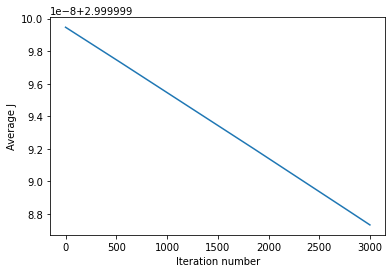

In [184]:
# plot the avg_cost_func 

# x label: "Iteration number"

# y label: "Average J"
plt.plot(costs)
plt.xlabel('Iteration number')
plt.ylabel('Average J')
plt.show()
plt.show()

## 5) Assessing accuracy
Next we determine what percentage the neural network correctly predicted the handwritten digit correctly on the test set

In [185]:
# get the prediction accuracy and print

print('Prediction accuracy is {}%'.format(accuracy_score(y_v_test, y_pred) * 100))

Prediction accuracy is 11.126564673157164%


## [64,50,30,10] NN with Tahn Activation function

[64, 50, 30, 10]
50
30
10
1078
Starting gradient descent for 3000 iterations
Iteration 1000 
Iteration 2000 
Iteration 3000 


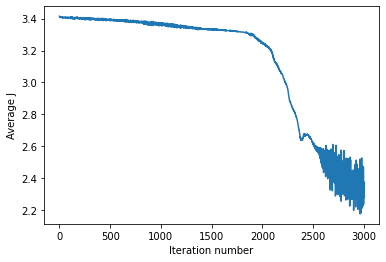

Prediction accuracy is 9.596662030598054%


In [186]:

    
# train the NN with the nn_structure and 3000 iterations
W_tanh,b_tanh,costs_tanh = train_nn(nn_structure,X_train,y_v_train,act_function = tanh, act_deriv = tanh_deriv)
y_pred_tanh = predict_y(W_tanh,b_tanh,X_test,nn_structure)
plt.plot(costs_tanh)
plt.xlabel('Iteration number')
plt.ylabel('Average J')
plt.show()
plt.show()
print('Prediction accuracy is {}%'.format(accuracy_score(y_v_test, y_pred_tanh) * 100))



#[64,50,30,10] NN with ReLu Activation Function

[64, 50, 30, 10]
50
30
10
1078
Starting gradient descent for 3000 iterations
Iteration 1000 
Iteration 2000 
Iteration 3000 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


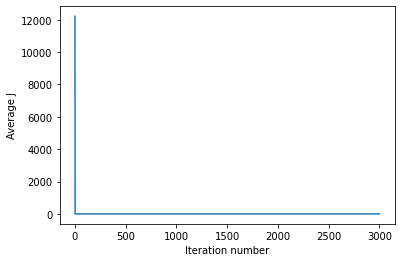

Prediction accuracy is 0.0%


In [187]:
W_relu,b_relu,costs_relu= train_nn(nn_structure,X_train,y_v_train,act_function = relu, act_deriv = relu_deriv)
y_pred_relu = predict_y(W_relu,b_relu,X_test,nn_structure)
plt.plot(costs_relu)
plt.xlabel('Iteration number')
plt.ylabel('Average J')
plt.show()
plt.show()
print('Prediction accuracy is {}%'.format(accuracy_score(y_v_test, y_pred_relu) * 100))

# Resources

- https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3
- https://towardsdatascience.com/understanding-neural-networks-19020b758230
- https://medium.com/@glenmeyerowitz/bias-initialization-in-a-neural-network-2e5d26fed0f0
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://towardsdatascience.com/understanding-neural-networks-what-how-and-why-18ec703ebd31
- https://www.coursera.org/learn/machine-learning/lecture/1z9WW/backpropagation-algorithm
- https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf


#Results 
After running the Neural Network Model using a structure of 4 layers composed of 64, 50, 30, and 10 neurons respectively with three different activation functions, we arrived to the following results:
- <b>[64,50,30,10] NN with Sigmoid Activation Function</b>:
- <b>[64,50,30,10] NN with Tanh Activation Function</b>:
- <b>[64,50,30,10] NN with ReLu Activation Function</b>:
The sigmoid Neural Network performed best, followed by the tan NN andb the ReLu NN. The Relu NN performed worst, probably because of its very shallow decision of activation that is biased for negative numbers.
